In [164]:
!pip install --quiet -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from pymongo import MongoClient
from pymongo import UpdateOne

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df_fraude = pd.read_csv('dados_fraude.csv')

In [7]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,id_clinica,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento
0,1,NaN,Falsificação de documentos,NaN,NaN,NaN,66762.00,NaN,NaN,NaN,3522.00,Ribeiro,NaN,NaN,1273.00,NaN,NaN,NaN,1982-01-15,NaN,NaN
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.00,48443.00,269.053.741-99,1947-11-28,(011) 4088 8235,9326.00,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.00,Consulta,200.00,1693.00,1982-01-15,216.43,Pago
2,3,Amet molestias cupiditate.,Uso indevido do plano,1985-04-04,Fechado,43047.00,53396.00,923.804.761-87,1955-07-01,+55 51 9372 8289,8088.00,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.00,Extração de siso,680.00,8095.00,1976-04-29,1210.76,Pago
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.00,53396.00,491.257.630-16,1958-09-25,(081) 5376-8386,4531.00,Silveira,28.403.915/0001-67,41 6375 5110,1055.00,Restauração,500.00,12037.00,1981-09-02,500.76,Cancelado
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.00,5263.00,213.509.874-41,1948-01-20,51 2618 5344,3153.00,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.00,Limpeza,250.00,12788.00,1981-09-02,252.41,Pendente


In [8]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_alerta                 100000 non-null  int64  
 1   motivo                    79449 non-null   object 
 2   tipo_fraude               100000 non-null  object 
 3   data_alerta               79449 non-null   object 
 4   status                    79449 non-null   object 
 5   id_solicitacao_pagamento  79449 non-null   float64
 6   id_paciente               100000 non-null  float64
 7   cpf_paciente              79449 non-null   object 
 8   data_nascimento_paciente  79449 non-null   object 
 9   telefone_paciente         79449 non-null   object 
 10  id_clinica                100000 non-null  float64
 11  razao_social_clinica      100000 non-null  object 
 12  cnpj_clinica              79449 non-null   object 
 13  telefone_clinica          79449 non-null   ob

In [9]:
df_fraude = df_fraude.dropna()

df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79449 entries, 1 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_alerta                 79449 non-null  int64  
 1   motivo                    79449 non-null  object 
 2   tipo_fraude               79449 non-null  object 
 3   data_alerta               79449 non-null  object 
 4   status                    79449 non-null  object 
 5   id_solicitacao_pagamento  79449 non-null  float64
 6   id_paciente               79449 non-null  float64
 7   cpf_paciente              79449 non-null  object 
 8   data_nascimento_paciente  79449 non-null  object 
 9   telefone_paciente         79449 non-null  object 
 10  id_clinica                79449 non-null  float64
 11  razao_social_clinica      79449 non-null  object 
 12  cnpj_clinica              79449 non-null  object 
 13  telefone_clinica          79449 non-null  object 
 14  id_procedim

In [10]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,id_clinica,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.00,48443.00,269.053.741-99,1947-11-28,(011) 4088 8235,9326.00,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.00,Consulta,200.00,1693.00,1982-01-15,216.43,Pago
2,3,Amet molestias cupiditate.,Uso indevido do plano,1985-04-04,Fechado,43047.00,53396.00,923.804.761-87,1955-07-01,+55 51 9372 8289,8088.00,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.00,Extração de siso,680.00,8095.00,1976-04-29,1210.76,Pago
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.00,53396.00,491.257.630-16,1958-09-25,(081) 5376-8386,4531.00,Silveira,28.403.915/0001-67,41 6375 5110,1055.00,Restauração,500.00,12037.00,1981-09-02,500.76,Cancelado
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.00,5263.00,213.509.874-41,1948-01-20,51 2618 5344,3153.00,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.00,Limpeza,250.00,12788.00,1981-09-02,252.41,Pendente
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.00,17236.00,930.156.287-12,1917-04-18,51 2618 5344,258.00,Cardoso S/A,91.527.864/0001-11,(084) 8133-2191,908.00,Extração de siso,727.00,34753.00,1981-09-02,672.73,Pendente


In [11]:
df_fraude['Chances_Fraude'] = df_fraude['tipo_fraude'].apply(lambda x: 0 if x == "Fraude não detectada" else 1)

df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,id_clinica,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.00,48443.00,269.053.741-99,1947-11-28,(011) 4088 8235,9326.00,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.00,Consulta,200.00,1693.00,1982-01-15,216.43,Pago,1
2,3,Amet molestias cupiditate.,Uso indevido do plano,1985-04-04,Fechado,43047.00,53396.00,923.804.761-87,1955-07-01,+55 51 9372 8289,8088.00,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.00,Extração de siso,680.00,8095.00,1976-04-29,1210.76,Pago,1
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.00,53396.00,491.257.630-16,1958-09-25,(081) 5376-8386,4531.00,Silveira,28.403.915/0001-67,41 6375 5110,1055.00,Restauração,500.00,12037.00,1981-09-02,500.76,Cancelado,1
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.00,5263.00,213.509.874-41,1948-01-20,51 2618 5344,3153.00,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.00,Limpeza,250.00,12788.00,1981-09-02,252.41,Pendente,1
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.00,17236.00,930.156.287-12,1917-04-18,51 2618 5344,258.00,Cardoso S/A,91.527.864/0001-11,(084) 8133-2191,908.00,Extração de siso,727.00,34753.00,1981-09-02,672.73,Pendente,1


C:\Users\lucas\AppData\Local\Temp\ipykernel_20048\1994376938.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs['F'].set_xticklabels(contagem_fraudes.index, rotation=45, ha="right")


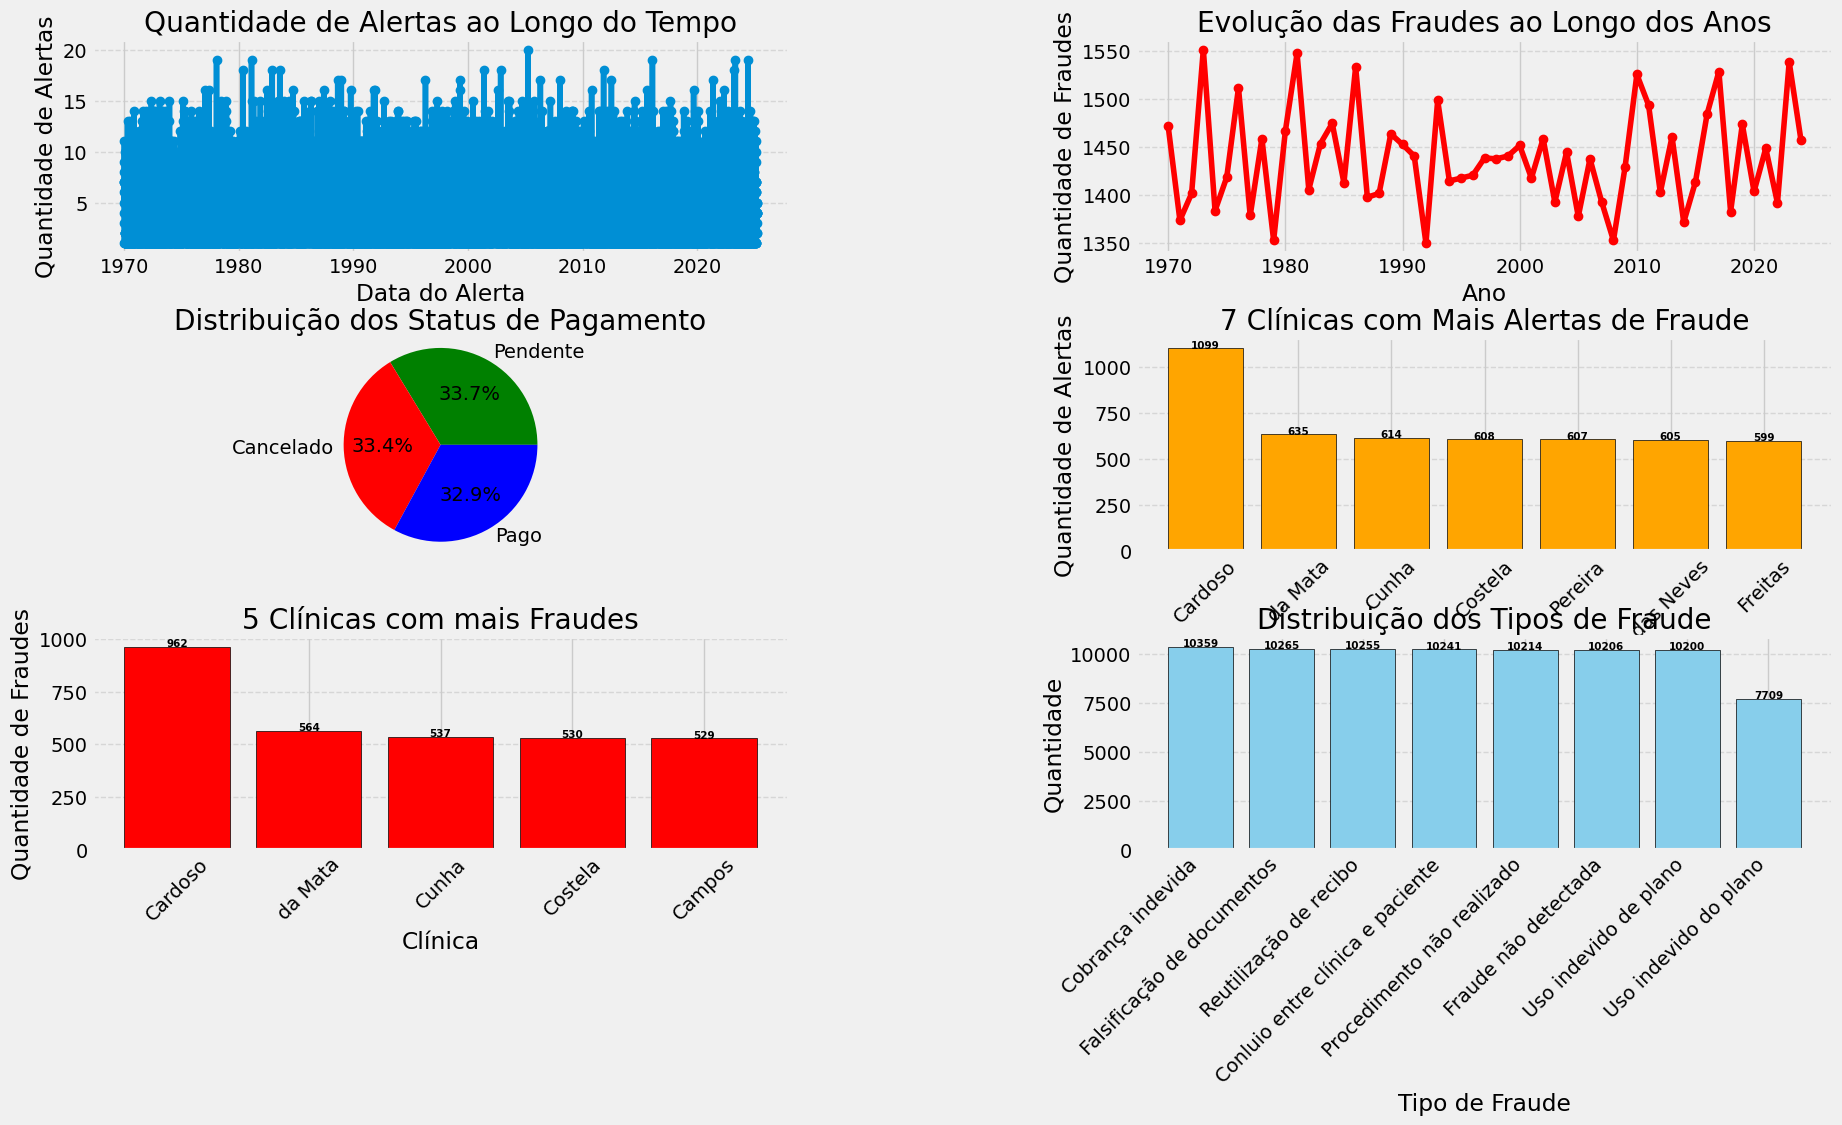

In [12]:
mosaico = "AB;CD;EF"
fig = plt.figure(figsize=(20, 10))
espacamento = {'wspace': 0.5, 'hspace': 0.4}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# Gráfico A
df_fraude["data_alerta"] = pd.to_datetime(df_fraude["data_alerta"])
alertas_por_data = df_fraude["data_alerta"].value_counts().sort_index()

axs['A'].plot(alertas_por_data.index, alertas_por_data.values, marker='o', linestyle='-')
axs['A'].set_xlabel("Data do Alerta")
axs['A'].set_ylabel("Quantidade de Alertas")
axs['A'].set_title("Quantidade de Alertas ao Longo do Tempo")
axs['A'].yaxis.grid(True, linestyle="--", alpha=0.7)

# Gráfico B
fraudes_por_ano = df_fraude.groupby(df_fraude["data_alerta"].dt.year).size()
fraudes_por_ano = fraudes_por_ano.iloc[:-1]

axs['B'].plot(fraudes_por_ano.index, fraudes_por_ano.values, marker='o', linestyle='-', color="red")
axs['B'].set_xlabel("Ano")
axs['B'].set_ylabel("Quantidade de Fraudes")
axs['B'].set_title("Evolução das Fraudes ao Longo dos Anos")
axs['B'].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico C
status_pagamento_counts = df_fraude["status_pagamento"].value_counts()
axs['C'].pie(status_pagamento_counts, labels=status_pagamento_counts.index, autopct="%1.1f%%", colors=["green", "red", "blue"])
axs['C'].set_title("Distribuição dos Status de Pagamento")
axs['C'].axis("equal")

# Gráfico D
top_clinicas = df_fraude["razao_social_clinica"].value_counts().nlargest(7)
axs['D'].bar(top_clinicas.index, top_clinicas.values, color="orange", edgecolor="black")

for i, v in enumerate(top_clinicas.values):
    axs['D'].text(i, v + 0.5, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['D'].set_xlabel("Clínica")
axs['D'].set_ylabel("Quantidade de Alertas")
axs['D'].set_title("7 Clínicas com Mais Alertas de Fraude")
axs['D'].tick_params(axis='x', rotation=45)
axs['D'].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico E
clinicas_fraudes = df_fraude[df_fraude['Chances_Fraude'] == 1]['razao_social_clinica'].value_counts().nlargest(5)
axs['E'].bar(clinicas_fraudes.index, clinicas_fraudes.values, color="red", edgecolor="black")

for i, v in enumerate(clinicas_fraudes.values):
    axs['E'].text(i, v + 0.5, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['E'].set_xlabel('Clínica')
axs['E'].set_ylabel('Quantidade de Fraudes')
axs['E'].set_title('5 Clínicas com mais Fraudes')
axs['E'].tick_params(axis='x', rotation=45)
axs['E'].grid(axis="y", linestyle='--', alpha=0.7)

# Gráfico F
contagem_fraudes = df_fraude["tipo_fraude"].value_counts()

axs['F'].bar(contagem_fraudes.index, contagem_fraudes.values, color="skyblue", edgecolor="black")

for i, v in enumerate(contagem_fraudes.values):
    axs['F'].text(i, v + 1, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['F'].set_xlabel("Tipo de Fraude")
axs['F'].set_ylabel("Quantidade")
axs['F'].set_title("Distribuição dos Tipos de Fraude")
axs['F'].set_xticklabels(contagem_fraudes.index, rotation=45, ha="right")
axs['F'].grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [13]:
df_fraude["id_paciente"].value_counts()

id_paciente
54050.00    15
36020.00    13
10985.00    11
27581.00    11
29342.00    10
            ..
34975.00     1
27349.00     1
30955.00     1
28820.00     1
23295.00     1
Name: count, Length: 42896, dtype: int64

In [14]:
contagem_alertas = df_fraude['id_paciente'].value_counts()

contagem_fraudes = df_fraude[df_fraude["Chances_Fraude"] == 1]['id_paciente'].value_counts()

df_fraude['Quantidade_alertas'] = df_fraude['id_paciente'].map(contagem_alertas)
df_fraude['Quantidade_fraudes'] = df_fraude['id_paciente'].map(contagem_fraudes).fillna(0).astype(int)

In [15]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,id_clinica,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.00,48443.00,269.053.741-99,1947-11-28,(011) 4088 8235,9326.00,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.00,Consulta,200.00,1693.00,1982-01-15,216.43,Pago,1,2,2
2,3,Amet molestias cupiditate.,Uso indevido do plano,1985-04-04,Fechado,43047.00,53396.00,923.804.761-87,1955-07-01,+55 51 9372 8289,8088.00,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.00,Extração de siso,680.00,8095.00,1976-04-29,1210.76,Pago,1,3,3
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.00,53396.00,491.257.630-16,1958-09-25,(081) 5376-8386,4531.00,Silveira,28.403.915/0001-67,41 6375 5110,1055.00,Restauração,500.00,12037.00,1981-09-02,500.76,Cancelado,1,3,3
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.00,5263.00,213.509.874-41,1948-01-20,51 2618 5344,3153.00,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.00,Limpeza,250.00,12788.00,1981-09-02,252.41,Pendente,1,3,2
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.00,17236.00,930.156.287-12,1917-04-18,51 2618 5344,258.00,Cardoso S/A,91.527.864/0001-11,(084) 8133-2191,908.00,Extração de siso,727.00,34753.00,1981-09-02,672.73,Pendente,1,1,1


In [16]:
encoder = LabelEncoder()

# Encoder Status_Pagamento
df_fraude["status_pagamento_encoder"] = encoder.fit_transform(df_fraude["status_pagamento"])

# Encoder Descrição
df_fraude["descricao_procedimento_encoded"] = encoder.fit_transform(df_fraude["descricao_procedimento"].astype(str))
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Criando Valor_Procedimento e Requirido
df_fraude["valor_procedimento"] = pd.to_numeric(df_fraude["valor_procedimento"], errors="coerce")
df_fraude["valor_requerido"] = pd.to_numeric(df_fraude["valor_requerido"], errors="coerce")

# Criando Diferença_Valor
df_fraude["diferenca_valor"] = df_fraude["valor_requerido"] - df_fraude["valor_procedimento"]

In [17]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,id_clinica,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes,status_pagamento_encoder,descricao_procedimento_encoded,diferenca_valor
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.00,48443.00,269.053.741-99,1947-11-28,(011) 4088 8235,9326.00,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.00,Consulta,200.00,1693.00,1982-01-15,216.43,Pago,1,2,2,1,1,16.43
2,3,Amet molestias cupiditate.,Uso indevido do plano,1985-04-04,Fechado,43047.00,53396.00,923.804.761-87,1955-07-01,+55 51 9372 8289,8088.00,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.00,Extração de siso,680.00,8095.00,1976-04-29,1210.76,Pago,1,3,3,1,2,530.76
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.00,53396.00,491.257.630-16,1958-09-25,(081) 5376-8386,4531.00,Silveira,28.403.915/0001-67,41 6375 5110,1055.00,Restauração,500.00,12037.00,1981-09-02,500.76,Cancelado,1,3,3,0,7,0.76
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.00,5263.00,213.509.874-41,1948-01-20,51 2618 5344,3153.00,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.00,Limpeza,250.00,12788.00,1981-09-02,252.41,Pendente,1,3,2,2,3,2.41
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.00,17236.00,930.156.287-12,1917-04-18,51 2618 5344,258.00,Cardoso S/A,91.527.864/0001-11,(084) 8133-2191,908.00,Extração de siso,727.00,34753.00,1981-09-02,672.73,Pendente,1,1,1,2,2,-54.27


In [18]:
df_fraude = df_fraude.drop(columns=[
    'id_alerta', 'motivo', 'tipo_fraude', 'data_alerta', 'status', 
    'id_solicitacao_pagamento', 'id_paciente', 'cpf_paciente', 
    'data_nascimento_paciente', 'telefone_paciente', 'descricao_procedimento', 
    'id_solicitacao', 'data_solicitacao', 'id_clinica', 'razao_social_clinica',
    'cnpj_clinica', 'telefone_clinica', 'id_procedimento', 'status_pagamento'
])



df_fraude.head()

,valor_procedimento,valor_requerido,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes,status_pagamento_encoder,descricao_procedimento_encoded,diferenca_valor
1,200.00,216.43,1,2,2,1,1,16.43
2,680.00,1210.76,1,3,3,1,2,530.76
3,500.00,500.76,1,3,3,0,7,0.76
4,250.00,252.41,1,3,2,2,3,2.41
5,727.00,672.73,1,1,1,2,2,-54.27


In [19]:
X = df_fraude.drop('Chances_Fraude', axis=1)
y = df_fraude['Chances_Fraude']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.20
)

In [20]:
modelo_fraude = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0: 2, 1: 1})
modelo_fraude.fit(X_train, y_train)

y_pred = modelo_fraude.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

Acurácia do modelo: 91.71%
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      2047
           1       0.94      0.96      0.95     13843

    accuracy                           0.92     15890
   macro avg       0.82      0.79      0.81     15890
weighted avg       0.91      0.92      0.91     15890



In [22]:
cliente = MongoClient("mongodb://localhost:27017")
banco = cliente["Odontoprev"]
colecao = banco["Odontoprev04"]

cpf_input = input("Digite o CPF desejado!")
documentos = list(colecao.find({"cpf_paciente": cpf_input}))

if documentos:
    df_busca = pd.DataFrame(documentos)

    df_busca = df_busca.drop(columns=["_id"], errors="ignore")
    print(df_busca)
else:
    print("Nenhum dado encontrado para este CPF.")

   id_alerta  nome_paciente cpf_paciente data_nascimento_paciente  \
0          1  Lucas Minozzo  11122233344               2004-10-06   
1         13  Lucas Minozzo  11122233344               2004-10-06   

  telefone_paciente          nome_clinica      procedimento  \
0       11964090604  Marcos Jordão Odonto           Limpeza   
1       11964090604  Marcos Jordão Odonto  Extração de siso   

   valor_procedimento  valor_requerido status_pagamento data_alerta  \
0                 200              250             Pago  2025-05-12   
1                 500              600             Pago  2025-05-19   

   previsao_fraude  
0             0.00  
1              NaN  


In [23]:
contagem_alertas = len(df_busca)

if "previsao_fraude" in df_busca.columns:
    contagem_fraudes = df_busca["previsao_fraude"].sum()
    
    df_busca = df_busca[df_busca["previsao_fraude"].isna()]
    df_busca = df_busca.drop(columns=["previsao_fraude"])
else:
    contagem_fraudes = 0

df_pred = df_busca.copy()
df_pred["Quantidade_alertas"] = contagem_alertas
df_pred["Quantidade_fraudes"] = contagem_fraudes

df_pred["descricao_procedimento_encoded"] = encoder.fit_transform(df_pred["procedimento"].astype(str))
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

df_pred["status_pagamento_encoder"] = encoder.fit_transform(df_pred["status_pagamento"])

df_pred["valor_procedimento"] = pd.to_numeric(df_pred["valor_procedimento"], errors="coerce")
df_pred["valor_requerido"] = pd.to_numeric(df_pred["valor_requerido"], errors="coerce")
df_pred["diferenca_valor"] = df_pred["valor_requerido"] - df_pred["valor_procedimento"]

df_pred

,id_alerta,nome_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,nome_clinica,procedimento,valor_procedimento,valor_requerido,status_pagamento,data_alerta,Quantidade_alertas,Quantidade_fraudes,descricao_procedimento_encoded,status_pagamento_encoder,diferenca_valor
1,13,Lucas Minozzo,11122233344,2004-10-06,11964090604,Marcos Jordão Odonto,Extração de siso,500,600,Pago,2025-05-19,2,0.00,0,0,100


In [24]:
df_pred = df_pred.drop(columns=[
    'data_alerta', 'nome_paciente', 'cpf_paciente', 
    'data_nascimento_paciente', 'telefone_paciente', 'procedimento', 
    'nome_clinica', 'status_pagamento'
])

df_pred

,id_alerta,valor_procedimento,valor_requerido,Quantidade_alertas,Quantidade_fraudes,descricao_procedimento_encoded,status_pagamento_encoder,diferenca_valor
1,13,500,600,2,0.00,0,0,100


In [25]:
features_utilizadas = [
    "valor_procedimento", 
    "valor_requerido", 
    "Quantidade_alertas", 
    "Quantidade_fraudes", 
    "status_pagamento_encoder",
    "descricao_procedimento_encoded",
    "diferenca_valor"
]

previsao = modelo_fraude.predict(df_pred[features_utilizadas])

df_pred["previsao_fraude"] = previsao

df_pred

,id_alerta,valor_procedimento,valor_requerido,Quantidade_alertas,Quantidade_fraudes,descricao_procedimento_encoded,status_pagamento_encoder,diferenca_valor,previsao_fraude
1,13,500,600,2,0.00,0,0,100,0


In [26]:
updates = []

for _, row in df_pred.iterrows():
    filtro = {"id_alerta": int(row["id_alerta"])}
    atualizacao = {"$set": {"previsao_fraude": int(row["previsao_fraude"])}}
    updates.append(UpdateOne(filtro, atualizacao))

if updates:
    resultado = colecao.bulk_write(updates)
    print(f"{resultado.modified_count} documento(s) atualizados com sucesso no MongoDB.")
else:
    print("Nenhum dado para atualizar.")

1 documento(s) atualizados com sucesso no MongoDB.
